In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow_addons as tfa  # thư viện cho Attention
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Input, Attention,concatenate
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

C:\Users\57\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\57\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issu

In [3]:

data = pd.read_csv(r'C:\Users\57\Desktop\DOANTOTNGHIEP\Data\KichBan1_2\train_data2.csv') 
data.set_index('Ngay', inplace=True)
print(data.head(5))

            mucNuocHN  nuocVeHoaBinh  chayMayHoaBinh  nuocVeTuyenQuang  \
Ngay                                                                     
01/01/2008        120        498.815         259.499               0.0   
02/01/2008        117        470.866         518.755               0.0   
03/01/2008        139        423.816         615.242               0.0   
04/01/2008        166        496.882         902.982               0.0   
05/01/2008        179        501.232        1072.970               0.0   

            chayMayTuyenQuan  nuocVeThacBa  chayMayThacBa  
Ngay                                                       
01/01/2008               0.0        23.230         90.200  
02/01/2008               0.0        26.239        213.791  
03/01/2008               0.0        24.000        175.000  
04/01/2008               0.0        11.000        164.000  
05/01/2008               0.0        24.000        177.000  


In [4]:
# Chuẩn hóa dữ liệu để đưa về khoảng [0, 1] để dễ xử lý khi đưa vào mô hình
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
# def create_sequences(data, seq_length):
#     sequences = []
#     targets = []
#     for i in range(len(data) - seq_length):
#         sequences.append(data[i:i + seq_length])
#         targets.append(data[i + seq_length, 0])  
#     return np.array(sequences), np.array(targets)

In [6]:
sequence_length = 1 # Sử dụng 30 ngày để dự đoán
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i])

X, y = np.array(X), np.array(y)

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(X_train)

[[[0.08651911 0.04639671 0.09251301 ... 0.         0.1056379  0.16986817]]

 [[0.08350101 0.04373844 0.18493939 ... 0.         0.1065453  0.40261959]]

 [[0.1056338  0.03926346 0.21933761 ... 0.         0.10587011 0.32956685]]

 ...

 [[0.5583501  0.50399467 0.8627451  ... 0.59950327 0.27341437 0.04531638]]

 [[0.62575453 0.49448355 0.86631016 ... 0.59065303 0.35991065 0.30062147]]

 [[0.68913481 0.36608332 0.84135472 ... 0.56628396 0.53145965 0.47092279]]]


In [8]:
output_dim = X_train.shape[2]
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(output_dim)
])

In [9]:
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense (Dense)               (None, 7)                 455       
                                                                 
Total params: 18887 (73.78 KB)
Trainable params: 18887 (73.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 3. Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50

64/64 [==============================] - 3s 13ms/step - loss: 0.0393 - val_loss: 0.0157
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.0130
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0108
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.0092
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0078
Epoch 6/50
64/64 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0068
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 8/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 9/50
64/64 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 10/50
64/64 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 11/50
64/64

In [11]:
# Hàm tính Nash-Sutcliffe Efficiency (NSE)
def nse(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - numerator / denominator

In [12]:
# Dự đoán
y_pred = model.predict(X_test)

# Chuyển đổi kích thước y_pred để phù hợp với y_test
y_pred = y_pred.reshape(y_pred.shape[0], -1)  # Biến đổi thành mảng 2 chiều


# Giảm số lượng mẫu của y_pred và y_test xuống còn 512 mẫu
y_pred_reduced = y_pred[:512]  # Cắt y_pred để chỉ lấy 512 mẫu đầu tiên
y_test_reduced = y_test[:512]  # Cắt y_test để chỉ lấy 512 mẫu đầu tiên
# Tính toán các chỉ số
r2 = r2_score(y_test_reduced, y_pred_reduced)
print("R² (R-squared):", r2)

mae = mean_absolute_error(y_test_reduced, y_pred_reduced)
print("MAE (Mean Absolute Error):", mae)

rmse = np.sqrt(mean_squared_error(y_test_reduced, y_pred_reduced))
print("RMSE (Root Mean Square Error):", rmse)

nse = nse(y_test_reduced, y_pred_reduced)
print("NSE (Nash-Sutcliffe Efficiency):", nse)


16/16 [==============================] - 1s 2ms/step
R² (R-squared): 0.7918190871031303
MAE (Mean Absolute Error): 0.04276662941230046
RMSE (Root Mean Square Error): 0.0750305218854303
NSE (Nash-Sutcliffe Efficiency): 0.8646302260976391


In [13]:
# 5. Vẽ đồ thị dự báo so sánh với thực tế cho từng mực nước
new_data = pd.read_csv(r'C:\Users\57\Desktop\DOANTOTNGHIEP\Data\KichBan1_2\test_data2_1.csv') 
new_data['Ngay'] = pd.to_datetime(new_data['Ngay'], format='%d/%m/%Y')
new_data.set_index('Ngay', inplace=True)
print(new_data)

            mucNuocHN  nuocVeHoaBinh  chayMayHoaBinh  nuocVeTuyenQuang  \
Ngay                                                                     
2015-01-01         85        575.000         757.694             120.0   
2015-01-02        114        840.327        1045.743             116.0   
2015-01-03        141       1059.445         976.320             115.0   
2015-01-04        147        576.221         671.221             115.0   
2015-01-05        135        875.634         946.884             116.0   
...               ...            ...             ...               ...   
2017-01-03        160        280.500         720.369              82.0   
2017-01-04        120        270.500         600.369              79.0   
2017-01-05        140        260.500         740.369              76.0   
2017-01-06        200        230.500         701.369              90.0   
2017-01-07        210        240.500         760.369              74.0   

            chayMayTuyenQuan  nuocVeT

In [14]:
data_test_scaled = scaler.transform(new_data)
# Chia dữ liệu mới thành chuỗi thời gian
# Tạo các mẫu test từ dữ liệu test
# Chia dữ liệu mới thành chuỗi thời gian
X_new,Y_new = [],[]
for i in range(sequence_length, len(data_test_scaled)):
    X_new.append(data_test_scaled[i-sequence_length:i])
    Y_new.append(data_test_scaled[i])
X_new = np.array(X_new)
print(len(X_new))
y_new = np.array(Y_new)

737


In [15]:
predictions = model.predict(X_new)
predictions_new_original = scaler.inverse_transform(predictions)[:,0]
y_test_new_original = scaler.inverse_transform(y_new)[:,0]
predictions_new_original = np.round(predictions_new_original, 3)

24/24 [==============================] - 1s 4ms/step


In [16]:
# Tạo mảng ngày bắt đầu từ chỉ số sequence_length của new_data
dates = new_data.index[sequence_length:]

# Đảm bảo số lượng phần tử của dự báo và thực tế khớp với số lượng ngày
min_length = min(len(dates), len(predictions_new_original), len(y_test_new_original))

# Cắt ngắn các mảng để khớp số phần tử nếu cần
dates = dates[:min_length]
predictions_new_original = predictions_new_original[:min_length]
y_test_new_original = y_test_new_original[:min_length]
# Tạo DataFrame với ngày, thực tế và dự báo
df_mucNuocHN = pd.DataFrame({
    'Ngay': dates,
    'ThucTe': y_test_new_original,
    'DuBao': predictions_new_original
})
# Đặt cột 'Ngay' làm chỉ mục
df_mucNuocHN.set_index('Ngay', inplace=True)

# Đặt tên đa cấp cho các cột với nhóm 'mucNuocHaNoi'
df_mucNuocHN.columns = pd.MultiIndex.from_product([['mucNuocHaNoi'], ['ThucTe', 'DuBao']])

# Hiển thị DataFrame
print(df_mucNuocHN)


           mucNuocHaNoi            
                 ThucTe       DuBao
Ngay                               
2015-01-02        114.0  102.490997
2015-01-03        141.0  129.968994
2015-01-04        147.0  148.365997
2015-01-05        135.0  146.223007
2015-01-06        127.0  141.091003
...                 ...         ...
2017-01-03        160.0  144.438995
2017-01-04        120.0  151.917999
2017-01-05        140.0  124.099998
2017-01-06        200.0  138.050995
2017-01-07        210.0  178.856003

[737 rows x 2 columns]


737
DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',
               '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', name='Ngay', length=737, freq=None)


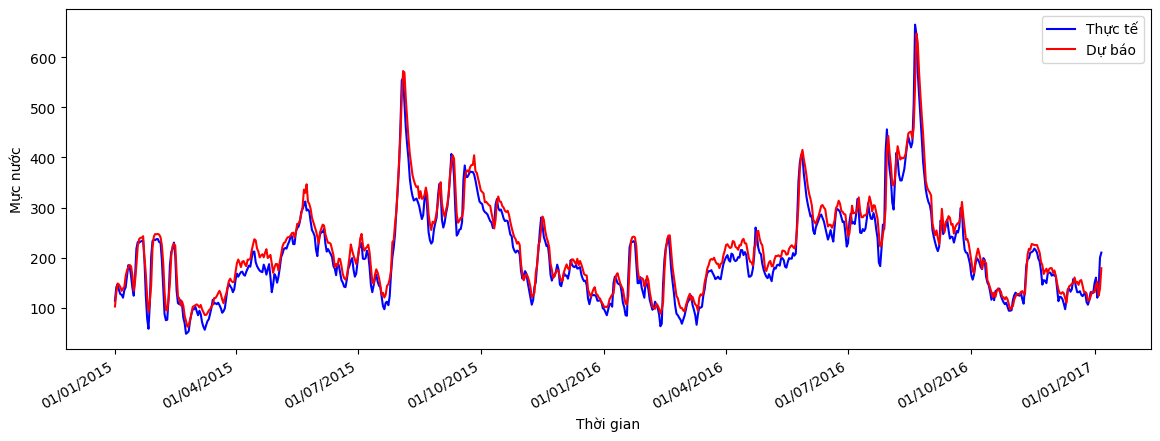

In [18]:
import matplotlib.dates as mdates

min_length = min(len(new_data.index), len(y_test_new_original), len(predictions_new_original))
print(min_length)
# Cắt ngắn mảng theo độ dài nhỏ nhất
dates = new_data.index[:min_length]

y_test_new_original = y_test_new_original[:min_length]
print(dates)
predictions_new_original = predictions_new_original[:min_length]

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(dates, y_test_new_original, label='Thực tế', color='blue')
plt.plot(dates, predictions_new_original, label='Dự báo', color='red')
plt.xlabel('Thời gian')
plt.ylabel('Mực nước')

# Định dạng ngày tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()